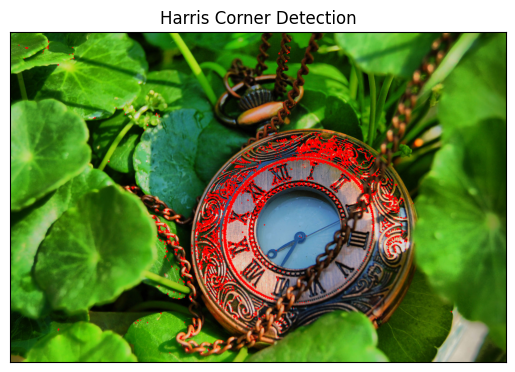

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/679_Macro.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float32 for cornerSubPix
gray = np.float32(gray)

# Apply Harris corner detector
# The parameters are:
# gray: Input image (grayscale, float32)
# blockSize: Size of the neighborhood considered for corner detection
# ksize: Aperture parameter of the Sobel derivative used
# k: Harris detector free parameter in the equation
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.01 * dst.max()] = [0, 0, 255] # Mark corners in red

# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection'), plt.xticks([]), plt.yticks([])
plt.show()

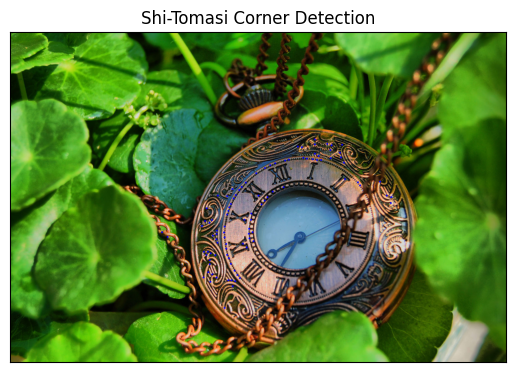

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('/content/679_Macro.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the strongest corners using Shi-Tomasi method
# The parameters are:
# gray: Input image (grayscale)
# maxCorners: Maximum number of corners to return. If there are more corners than maxCorners, the strongest ones are returned.
# qualityLevel: Parameter characterizing the minimal acceptable quality of image corners. The value of the parameter is multiplied by the best corner quality measure, which is the minimal eigenvalue (see cornerMinEigenVal). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure M, and qualityLevel=0.01, then all corners with the quality measure less than 0.01 * M are rejected.
# minDistance: Minimum possible Euclidean distance between the returned corners.
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.intp(corners)

# Draw the corners on the original image
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection'), plt.xticks([]), plt.yticks([])
plt.show()

**Comparison of Harris and Shi-Tomasi Corner Detection:**

- **Harris Corner Detector:**
    - Based on the auto-correlation function and the change in intensity for small shifts in different directions.
    - Detects corners by looking for points where there are large changes in intensity in all directions.
    - Can detect corners even with rotation.
    - The output is a corner response map, and corners are typically found by thresholding this map.

- **Shi-Tomasi Corner Detector:**
    - Also based on the auto-correlation function, but it uses a different scoring function.
    - It selects corners based on the minimum eigenvalue of the 2x2 gradient covariance matrix.
    - Often finds "better" corners for tracking purposes compared to Harris.
    - Directly provides a list of the strongest corners up to a specified maximum number.

In general, Shi-Tomasi is often preferred for applications like feature tracking because it tends to find corners that are more stable and easier to track.

In [6]:
# The outputs from the previous cells already display the results of Harris and Shi-Tomasi
# side-by-side comparison can be done by visually inspecting the outputs above.
# No new code is needed to display them again.
print("Please scroll up to see the outputs of the Harris and Shi-Tomasi corner detection cells for comparison.")

Please scroll up to see the outputs of the Harris and Shi-Tomasi corner detection cells for comparison.


Let's explore SIFT and SURF, two powerful feature detection algorithms:

**SIFT (Scale-Invariant Feature Transform):**
- Detects and describes local features in images.
- The features are invariant to scale, rotation, and illumination changes.
- It involves four main steps:
    1. **Scale-space extrema detection:** Identify potential interest points across different scales.
    2. **Keypoint localization:** Refine the detected keypoints and eliminate poor ones.
    3. **Orientation assignment:** Assign an orientation to each keypoint to achieve rotation invariance.
    4. **Keypoint descriptor:** Create a unique descriptor for each keypoint based on the gradient information around it.
- SIFT descriptors are high-dimensional (128 dimensions), making them robust but computationally expensive.

**SURF (Speeded Up Robust Features):**
- A faster alternative to SIFT.
- Uses integral images to speed up the convolution process for detecting features.
- Uses a Hessian matrix-based approach for feature detection.
- The descriptor is based on the sum of Haar wavelet responses around the keypoint.
- SURF descriptors are typically 64 dimensions, making them faster to compute and match than SIFT.

**Key Differences and Use Cases:**
- **Speed:** SURF is generally faster than SIFT.
- **Robustness:** Both are robust to various image transformations, but SIFT might be slightly more robust to a wider range of transformations.
- **Complexity:** SIFT is more complex to implement than SURF.
- **Applications:** Both are widely used in applications like object recognition, image stitching, 3D reconstruction, and more.

While both SIFT and SURF were patented, they are now freely available for use in many libraries like OpenCV.